<a href="https://colab.research.google.com/github/KU-Gen-AI-2567/Diffusion/blob/main/Diffusion_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffusion Model - 01418496
**สมาชิกกลุ่ม**

นายศิวกร ภาสว่าง 6410451423

นางสาว เเพรวรุ้ง พุดชะวา 6410451253

นางสาว มารีน่า มิทซุย 6410450222

หมู่ 200

ชุดข้อมูล : Fruit classification(10 Class)

ลิ้งดาวน์โหลด : https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class

In [1]:
import tensorflow as tf
import numpy as np
import os
import kagglehub
import shutil
import pandas as pd

## Setting to execute on Processor (GPU or CPU)

In [2]:
gpus = tf.config.list_physical_devices("GPU")
if len(gpus) > 0:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("Execute on GPU")
else:
    print("Execute on CPU")

Execute on CPU


## Download Dataset

In [4]:
# Download the dataset folder in latest version
if not "dataset" in os.listdir("."):
    path = kagglehub.dataset_download("karimabdulnabi/fruit-classification10-class")
    print("Path to dataset files:", path)
    shutil.move(path, "./dataset")
    print("Download Dataset Complete")
else:
    print("Download Dataset Already")

100%|██████████| 29.2M/29.2M [00:00<00:00, 102MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/karimabdulnabi/fruit-classification10-class/versions/1
Download Dataset Complete


## Prepossessing

In [5]:
from tensorflow.keras import utils

IMAGE_SIZE = 64 # 🤔

train_data = utils.image_dataset_from_directory(
    "./dataset",
    labels=None,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=None,
    shuffle=True,
    seed=42,
    interpolation="bilinear",
)

train_data

Found 3374 files.


<_PrefetchDataset element_spec=TensorSpec(shape=(64, 64, 3), dtype=tf.float32, name=None)>

In [6]:
import tensorflow as tf

DATASET_REPETITIONS = 5 # 🤔
BATCH_SIZE = 64 # 🤔

def preprocess(img):
    img = tf.cast(img, "float32") / 255.0 # 🤔
    return img

train = train_data.map(lambda x: preprocess(x))
train = train.repeat(DATASET_REPETITIONS)
train = train.batch(BATCH_SIZE, drop_remainder=True)
train

<_BatchDataset element_spec=TensorSpec(shape=(64, 64, 64, 3), dtype=tf.float32, name=None)>

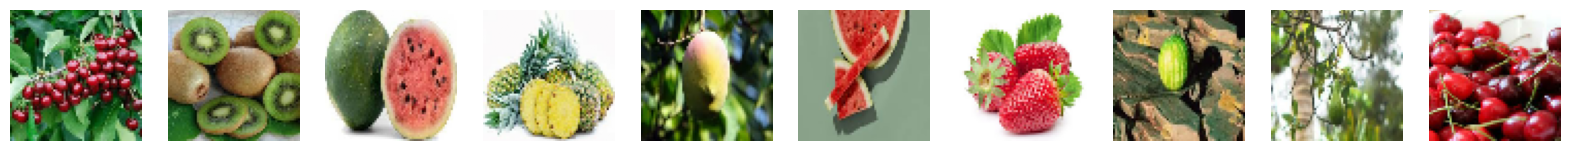

In [18]:
import matplotlib.pyplot as plt

def sample_batch(dataset):
    batch = dataset.take(1).get_single_element()
    batch = batch[0] if isinstance(batch, tuple) else batch
    return batch.numpy()

def display(images, n=10, size=(20, 3), cmap="gray_r", as_type="float32"):
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)

    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    plt.show()

train_sample = sample_batch(train)
display(train_sample)

### Diffusion schedules

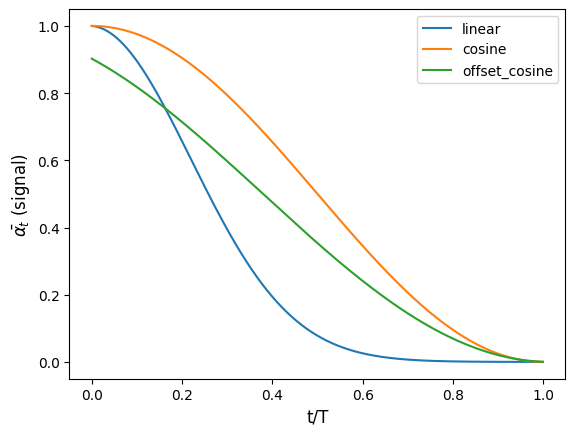

In [19]:
import math

def linear_diffusion_schedule(diffusion_times):
    min_rate = 0.0001
    max_rate = 0.02
    betas = min_rate + diffusion_times * (max_rate - min_rate)
    alphas = 1 - betas
    alpha_bars = tf.math.cumprod(alphas)
    signal_rates = tf.sqrt(alpha_bars)
    noise_rates = tf.sqrt(1 - alpha_bars)
    return noise_rates, signal_rates

def cosine_diffusion_schedule(diffusion_times):
    signal_rates = tf.cos(diffusion_times * math.pi / 2)
    noise_rates = tf.sin(diffusion_times * math.pi / 2)
    return noise_rates, signal_rates

def offset_cosine_diffusion_schedule(diffusion_times):
    min_signal_rate = 0.02
    max_signal_rate = 0.95
    start_angle = tf.acos(max_signal_rate)
    end_angle = tf.acos(min_signal_rate)

    diffusion_angles = start_angle + diffusion_times * (end_angle - start_angle)

    signal_rates = tf.cos(diffusion_angles)
    noise_rates = tf.sin(diffusion_angles)

    return noise_rates, signal_rates

T = 1000
diffusion_times = tf.convert_to_tensor([x / T for x in range(T)])
linear_noise_rates, linear_signal_rates = linear_diffusion_schedule(diffusion_times)
cosine_noise_rates, cosine_signal_rates = cosine_diffusion_schedule(diffusion_times)
offset_cosine_noise_rates, offset_cosine_signal_rates = offset_cosine_diffusion_schedule(diffusion_times)

plt.plot(diffusion_times, linear_signal_rates**2, linewidth=1.5, label="linear")
plt.plot(diffusion_times, cosine_signal_rates**2, linewidth=1.5, label="cosine")
plt.plot(diffusion_times, offset_cosine_signal_rates**2, linewidth=1.5, label="offset_cosine")

plt.xlabel("t/T", fontsize=12)
plt.ylabel(r"$\bar{\alpha_t}$ (signal)", fontsize=12)
plt.legend()
plt.show()

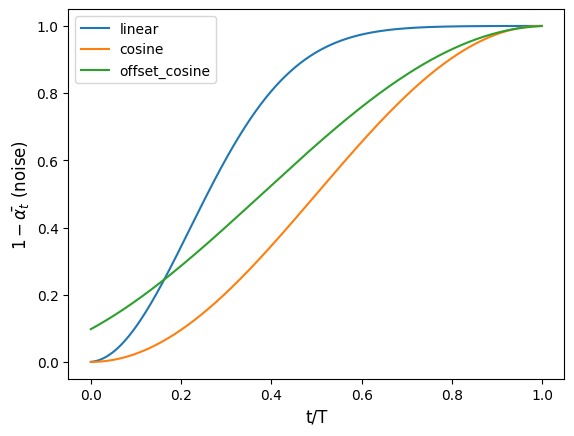

In [20]:
plt.plot(diffusion_times, linear_noise_rates**2, linewidth=1.5, label="linear")
plt.plot(diffusion_times, cosine_noise_rates**2, linewidth=1.5, label="cosine")
plt.plot(diffusion_times, offset_cosine_noise_rates**2, linewidth=1.5, label="offset_cosine")

plt.xlabel("t/T", fontsize=12)
plt.ylabel(r"$1-\bar{\alpha_t}$ (noise)", fontsize=12)
plt.legend()
plt.show()

## Create Model

In [ ]:
# Code for creating model

## Visualization

In [ ]:
# Code for Visualization

## Member Participation
**รายระเอียดการมีส่วนร่วม**
> - hello
> - hello
> - hello

**การใช้เครื่องมือปัญญาประดิษฐ์**
> - hello
> - hello
> - hello